# import common modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import keras
from scipy.special import softmax
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [0]:
batch_size = 32
epochs = 100

# load CIFAR10 dataset

In [3]:
from keras.datasets import cifar10

# set cifar10 information
img_rows, img_cols, img_channels = 32, 32, 3
num_classes = 10
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse','ship', 'truck']

# load dataset and check data shape
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
print('data.shape:  train:{} test:{}'.format(train_data.shape, test_data.shape))
print('label.shape: train:{} test:{}'.format(train_label.shape, test_label.shape))

170500096/170498071 [==============================] - 11s 0us/step
data.shape:  train:(50000, 32, 32, 3) test:(10000, 32, 32, 3)
label.shape: train:(50000, 1) test:(10000, 1)


# process data

In [4]:
from sklearn.model_selection import train_test_split

# #### process data for training
# split train data into train and validation
x_train, x_validation, y_train, y_validation = train_test_split(train_data, train_label, test_size=0.2, random_state=42)
x_test = test_data
y_test = test_label

print (x_train.shape, x_validation.shape, x_test.shape)
print (y_train.shape, y_validation.shape, y_test.shape)
# print (train_labels.shape)
# print (np.squeeze(train_labels, axis=1).shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 1) (10000, 1) (10000, 1)


In [5]:
# #### process zero-shot learning (zsl) data

# get index for removing bird and truck from datasets
def get_zsl_index(data, label, cifar10_labels):
    zsl_index = np.where((label.T[0] == cifar10_labels.index("bird")) |
                          (label.T[0] == cifar10_labels.index("truck")))
    return zsl_index

# get zsl index for each dataset
index_y_zsl_train = get_zsl_index(x_train, y_train, cifar10_labels)
index_y_zsl_validation = get_zsl_index(x_validation, y_validation, cifar10_labels)
index_y_zsl_test = get_zsl_index(x_test, y_test, cifar10_labels)

# delete zsl data from train set
y_zsl_train = np.delete(y_train, index_y_zsl_train, axis=0)
x_zsl_train = np.delete(x_train, index_y_zsl_train, axis=0)

# delete zsl data from validation set
y_zsl_validation = np.delete(y_validation, index_y_zsl_validation, axis=0)
x_zsl_validation = np.delete(x_validation, index_y_zsl_validation, axis=0)

# get zsl data from test set
y_zsl_test = np.take(y_test, index_y_zsl_test, axis=0)[0]
x_zsl_test = np.take(x_test, index_y_zsl_test, axis=0)[0]

print ("train: {}, {}".format(y_zsl_train.shape, x_zsl_train.shape))
print ("validation: {}, {}".format(y_zsl_validation.shape, x_zsl_validation.shape))
print ("test: {}, {}".format(y_zsl_test.shape, x_zsl_test.shape))

train: (32070, 1), (32070, 32, 32, 3)
validation: (7930, 1), (7930, 32, 32, 3)
test: (2000, 1), (2000, 32, 32, 3)


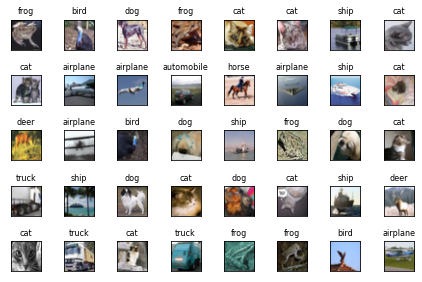

In [6]:
def plot_cifar10(dataset_labels, x_train, y_train):
    plt.clf()
    for i in range(0, 40):
      plt.subplot(5, 8, i+1)
      pixels = x_train[i,:,:,:]
      plt.title(dataset_labels[y_train[i][0]], fontsize=8)
      fig = plt.imshow(pixels)
      fig.axes.get_xaxis().set_visible(False)
      fig.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.savefig('cifar10_image_train.png')
    return
plot_cifar10(cifar10_labels, x_train, y_train)

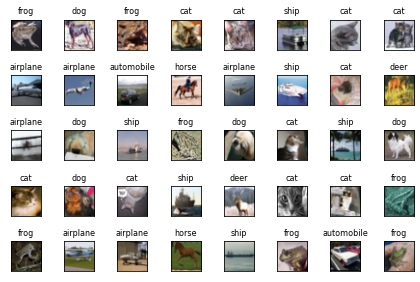

In [7]:
plot_cifar10(cifar10_labels, x_zsl_train, y_zsl_train)

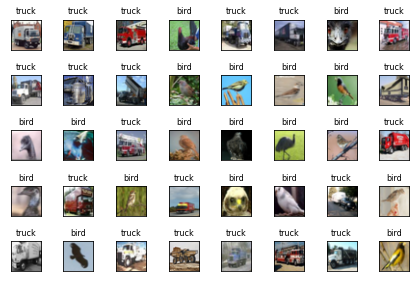

In [8]:
plot_cifar10(cifar10_labels, x_zsl_test, y_zsl_test)

# visualise images data

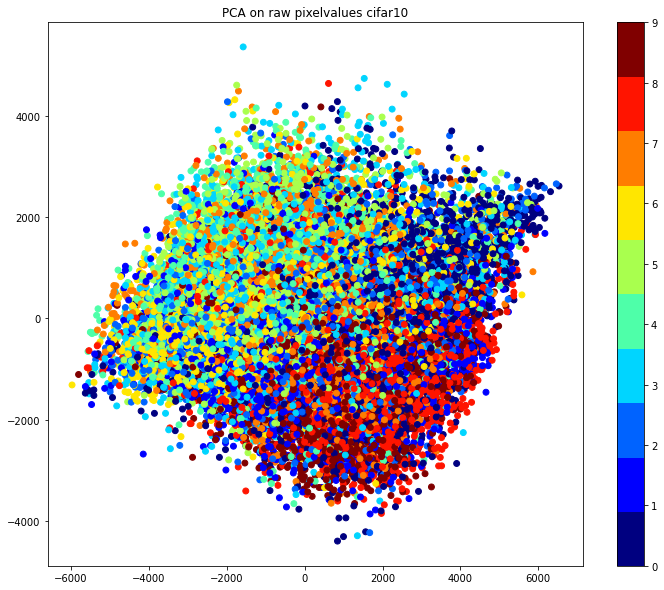

In [9]:
# Ref: https://colab.research.google.com/github/tensorchiefs/dl_course_2018/blob/master/notebooks/15_unsupervised_features_solution.ipynb
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# reshape data to two dimensions
x_train_reshape = x_train.reshape(x_train.shape[0], -1)

# calculate PCA
pca = PCA(n_components=2)
pca.fit(x_train_reshape)
transform_pca = pca.transform(x_train_reshape)

# plot PCA
plt.figure(figsize=(12,10))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=transform_pca[:,0],
            y=transform_pca[:,1],
            c=y_train.reshape(len(x_train)), s=35, cmap=cmap)
plt.title("PCA on raw pixelvalues cifar10")
plt.colorbar()
plt.show()

In [0]:
# # this process takes time
# from sklearn.manifold import TSNE
# model = TSNE(n_components=2, random_state=0)
# tsne = model.fit_transform(x_train.reshape(x_train.shape[0], -1))
# plt.figure(figsize=(8,8))
# cmap = cm.get_cmap('jet', 10)
# plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train.reshape(len(x_train)),s=35,cmap=cmap)
# plt.title("t-sne on raw pixelvalues cifar10")
# plt.colorbar()
# plt.show()

# get word2vec model

In [0]:
# Ref: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py

import gensim.downloader as api
# # download google news word2vec model (take time a bit for downloading)
# word2vec_model = api.load('word2vec-google-news-300')

In [12]:
glove_model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# # test word similarity
# print(len(word2vec_model['bird']), word2vec_model['bird'][:5]) 
# word2vec_model.similar_by_word('bird')

In [0]:
# word2vec_model.similar_by_word('computer')

In [15]:
glove_model.similar_by_word('computer')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('computers', 0.9165046215057373),
 ('software', 0.8814994096755981),
 ('technology', 0.852556049823761),
 ('electronic', 0.812586784362793),
 ('internet', 0.8060455322265625),
 ('computing', 0.8026036024093628),
 ('devices', 0.8016185760498047),
 ('digital', 0.7991793155670166),
 ('applications', 0.7912740111351013),
 ('pc', 0.788316011428833)]

## process word vector

In [0]:
def process_selected_word_vector(model, selected_words):
    # Ref: https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229
    model_len = model["bird"].shape[0]
    word_array = np.empty((0,model_len), dtype='f')
    word_labels = []

    # add the vector for each of the selected words to the array
    for word in selected_words:
        word_vector = model[word]
        word_labels.append(word)
        word_array = np.append(word_array, np.array([word_vector]), axis=0)
    print (type(word_array), word_array.shape)
    return word_array, word_labels

def plot_tsne_for_word_vector(word_array, word_labels):        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(word_array)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

    plt.xlim(x_coords.min()*1.2, x_coords.max()*1.2)
    plt.ylim(y_coords.min()*1.2, y_coords.max()*1.2)
    plt.show()
    return

In [0]:
# # google model
# selected_word_array, selected_word_labels = process_selected_word_vector(
#     word2vec_model, cifar10_labels)
# plot_tsne_for_word_vector(selected_word_array, selected_word_labels)

<class 'numpy.ndarray'> (10, 50)


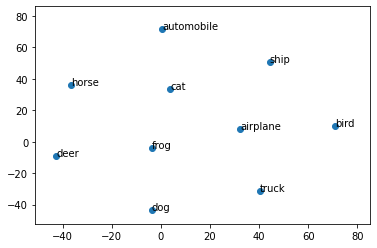

In [18]:
# glove model
selected_word_array, selected_word_labels = process_selected_word_vector(
    glove_model, cifar10_labels)
plot_tsne_for_word_vector(selected_word_array, selected_word_labels)

In [19]:
selected_word_array

array([[ 1.2977    , -0.29922   ,  0.66154   , -0.20133   , -0.02502   ,
         0.28644   , -1.0811    , -0.13045   ,  0.64917   , -0.33634   ,
         0.53352   ,  0.32792   , -0.43206   ,  1.4613    ,  0.022957  ,
        -0.26019   , -1.1061    ,  1.077     , -0.99877   , -1.3468    ,
         0.39016   ,  0.43799   , -1.0403    , -0.36612   ,  0.39231   ,
        -1.3089    , -0.82404   ,  0.63095   ,  1.2513    ,  0.10211   ,
         1.2735    , -0.0050163 , -0.39469   ,  0.36387   ,  0.65099   ,
        -0.21433   ,  0.52291   , -0.079013  , -0.14676   ,  0.89248   ,
        -0.31447   ,  0.090903  ,  0.78216   , -0.10842   , -0.3186    ,
         0.16068   , -0.20168   , -0.095033  , -0.010109  ,  0.19048   ],
       [-0.41195   ,  0.069058  ,  0.26701   ,  0.41424   , -0.91901   ,
         0.63319   , -0.89194   , -0.53483   ,  0.19187   , -0.038827  ,
         1.1475    , -0.1396    , -0.66392   , -0.19639   ,  0.30304   ,
        -0.06703   , -0.95611   ,  1.6306    ,  0.

# Classification model

## create common functions

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels, title):
    # get_metrics
    print('Accuracy:', metrics.accuracy_score(true_labels, predicted_labels))
    print('Precision:', metrics.precision_score(true_labels, predicted_labels, average='weighted'))
    print('Recall:', metrics.recall_score(true_labels, predicted_labels, average='weighted'))
    print('F1 Score:', metrics.f1_score(true_labels, predicted_labels,average='weighted'))

    # confusion matrix
    labels = list(set(true_labels))
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    cm_labeled = pd.DataFrame(cm, columns=labels, index=labels)
    sns.heatmap(cm_labeled, annot=True, cmap='Greens', fmt='g')
    plt.title(title)
    return

def plot_accuracy(history):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle('Performance', fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_lenght = len(history.history['acc'])+1
    epoch_list = list(range(1,epoch_lenght))
    ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epoch_lenght, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epoch_lenght, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

## process label data for running classification models

In [21]:
# convert class vectors to binary class matrices using zsl data
train_labels_cat = keras.utils.to_categorical(y_zsl_train, num_classes)
validation_labels_cat = keras.utils.to_categorical(y_zsl_validation, num_classes)
test_labels_cat = keras.utils.to_categorical(y_zsl_test, num_classes)
print (type(train_labels_cat), train_labels_cat.shape, validation_labels_cat.shape, test_labels_cat.shape)

<class 'numpy.ndarray'> (32070, 10) (7930, 10) (2000, 10)


In [22]:
# normalise selected_word_array
scaler_train = MinMaxScaler(feature_range = (0, 1))
selected_word_array = scaler_train.fit_transform(selected_word_array)
print (type(selected_word_array), selected_word_array.shape)

<class 'numpy.ndarray'> (10, 50)


In [23]:
# create word vector labels
train_labels_word = []
validation_labels_word = []
test_labels_word = []
for i in range(len(y_zsl_train)):
    train_labels_word.append(selected_word_array[y_zsl_train[i]])
for i in range(len(y_zsl_validation)):
    validation_labels_word.append(selected_word_array[y_zsl_validation[i]])
for i in range(len(y_zsl_test)):
    test_labels_word.append(selected_word_array[y_zsl_test[i]])
train_labels_word = np.squeeze(np.array(train_labels_word))
validation_labels_word = np.squeeze(np.array(validation_labels_word))
test_labels_word = np.squeeze(np.array(test_labels_word))
print (type(train_labels_word), train_labels_word.shape, validation_labels_word.shape, test_labels_word.shape)

<class 'numpy.ndarray'> (32070, 50) (7930, 50) (2000, 50)


In [0]:
# # normalise label data - testing 
# scaler_train = MinMaxScaler(feature_range = (0, 1))
# train_labels_word = scaler_train.fit_transform(train_labels_word)
# validation_labels_word = scaler_train.fit_transform(validation_labels_word)
# test_labels_word = scaler_train.fit_transform(test_labels_word)
# print (type(train_labels_word), train_labels_word.shape, validation_labels_word.shape, test_labels_word.shape)

In [0]:
# normalise data for training
x_train_norm = x_train.astype('float32')
x_validation_norm = x_validation.astype('float32')
x_test_norm = x_test.astype('float32')
x_zsl_train_norm = x_zsl_train.astype('float32')
x_zsl_validation_norm = x_zsl_validation.astype('float32')
x_zsl_test_norm = x_zsl_test.astype('float32')

x_train_norm /= 255
x_validation_norm /= 255
x_test_norm /= 255
x_zsl_train_norm /= 255
x_zsl_validation_norm /= 255
x_zsl_test_norm /= 255

## train models

In [26]:
selected_word_array.shape#[1]

(10, 50)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# build cnn models
# Ref: https://keras.io/examples/cifar10_cnn/
def cnn_model_word_class(selected_word_array):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                    input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(selected_word_array.shape[1])) # for word class
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

def cnn_model_category_class(selected_word_array):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                    input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(selected_word_array.shape[1])) # for word class
    model.add(Dense(selected_word_array.shape[0])) # for cifar10 categoy class
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [28]:
image_class_model = cnn_model_category_class(selected_word_array)
image_class_model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0        

## image class model

In [29]:
image_class_history = image_class_model.fit(x_zsl_train_norm, train_labels_cat,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_zsl_validation_norm, validation_labels_cat),
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 32070 samples, validate on 7930 samples
Epoch 1/100





32070/32070 [==============================] - 19s 594us/step - loss: 1.6974 - acc: 0.3508 - val_loss: 1.5056 - val_acc: 0.4554
Epoch 2/100
32070/32070 [==============================] - 6s 190us/step - loss: 1.3347 - acc: 0.5006 - val_loss: 1.2417 - val_acc: 0.5492
Epoch 3/100
32070/32070 [==============================] - 6s 199us/step - loss: 1.1924 - acc: 0.5582 - val_loss: 1.1541 - val_acc: 0.5594
Epoch 4/100
32070/32070 [==============================] - 6s 194us/step - loss: 1.1065 - acc: 0.5958 - val_loss: 1.0642 - val_acc: 0.6029
Epoch 5/100
32070/32070 [==============================] - 6s 192us/step - loss: 1.0341 - acc: 0.6215 - val_loss: 1.0865 - val_acc: 0.5950
Epoch 6/100
32070/32070 [==============================] - 6s 189us/step - loss: 0.9779 - acc: 0.6436 - val_loss: 0.9043 - val_acc: 0.6667
Epoch 7/100
32

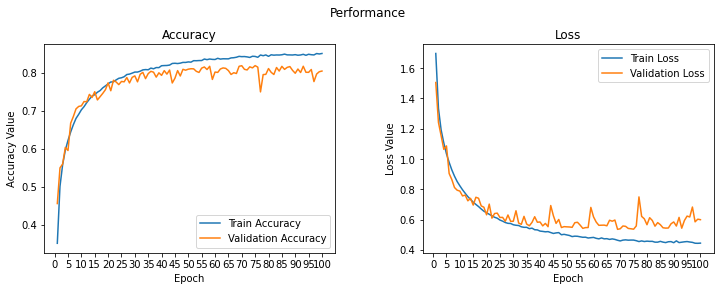

In [30]:
plot_accuracy(image_class_history)

Accuracy: 0.722075
Precision: 0.5979788441359642
Recall: 0.722075
F1 Score: 0.6471624682933534


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


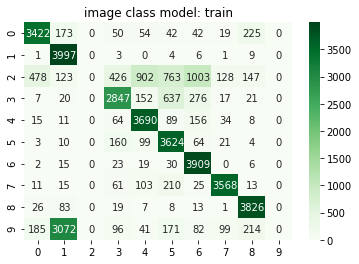

In [31]:
# predict train data
pred_train_model = image_class_model.predict_classes(x_train_norm)
plot_confusion_matrix(y_train.T[0], pred_train_model, "image class model: train")

Accuracy: 0.9006236357966947
Precision: 0.904945148079809
Recall: 0.9006236357966947
F1 Score: 0.8996956302303689


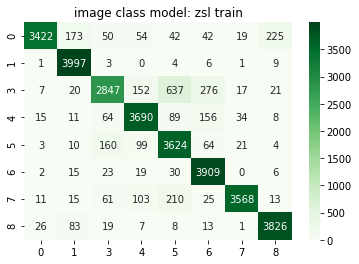

In [32]:
# predict zsl train data
pred_train_model = image_class_model.predict_classes(x_zsl_train_norm)
plot_confusion_matrix(y_zsl_train.T[0], pred_train_model, "image class model: zsl train")

Accuracy: 0.8039092055485498
Precision: 0.8100274610632738
Recall: 0.8039092055485498
F1 Score: 0.8004388728913007


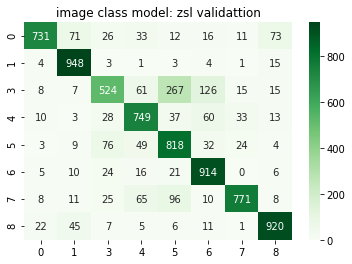

In [33]:
# predict zsl validation data
pred_validation_model = image_class_model.predict_classes(x_zsl_validation_norm)
plot_confusion_matrix(y_zsl_validation.T[0], pred_validation_model, "image class model: zsl validattion")

Accuracy: 0.646
Precision: 0.5356907902474494
Recall: 0.646
F1 Score: 0.5767538844437845


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


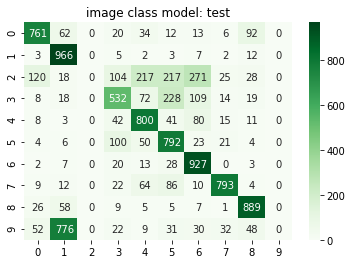

In [34]:
# predict test data
pred_test_model = image_class_model.predict_classes(x_test_norm)
plot_confusion_matrix(y_test.T[0], pred_test_model, "image class model: test")

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


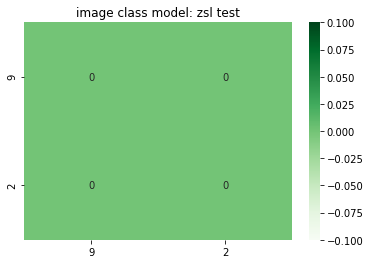

In [35]:
# predict zsl test data
pred_test_model = image_class_model.predict_classes(x_zsl_test_norm)
plot_confusion_matrix(y_zsl_test.T[0], pred_test_model, "image class model: zsl test")

## word class model

In [36]:
word_class_model = cnn_model_word_class(selected_word_array)
word_class_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [37]:
word_class_history = word_class_model.fit(x_zsl_train_norm, train_labels_word,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_zsl_validation_norm, validation_labels_word),
          shuffle=True)

Train on 32070 samples, validate on 7930 samples
Epoch 1/100
32070/32070 [==============================] - 6s 192us/step - loss: 90.7445 - acc: 0.0674 - val_loss: 90.0740 - val_acc: 0.1516
Epoch 2/100
32070/32070 [==============================] - 6s 178us/step - loss: 89.8751 - acc: 0.1027 - val_loss: 89.6245 - val_acc: 0.1607
Epoch 3/100
32070/32070 [==============================] - 6s 179us/step - loss: 89.4356 - acc: 0.1229 - val_loss: 89.4830 - val_acc: 0.1397
Epoch 4/100
32070/32070 [==============================] - 6s 188us/step - loss: 89.1523 - acc: 0.1374 - val_loss: 89.3122 - val_acc: 0.1464
Epoch 5/100
32070/32070 [==============================] - 6s 187us/step - loss: 88.9398 - acc: 0.1486 - val_loss: 88.9503 - val_acc: 0.2061
Epoch 6/100
32070/32070 [==============================] - 6s 180us/step - loss: 88.7626 - acc: 0.1599 - val_loss: 88.7527 - val_acc: 0.1938
Epoch 7/100
32070/32070 [==============================] - 6s 177us/step - loss: 88.6261 - acc: 0.1694 - 

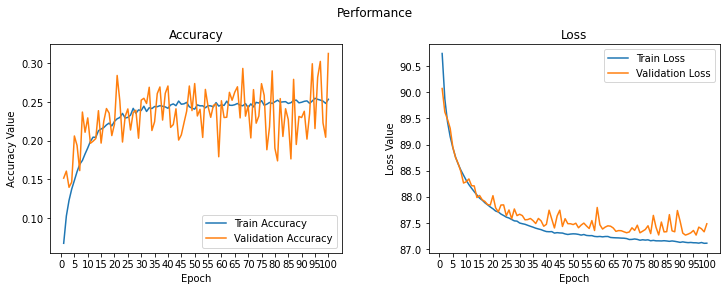

In [38]:
plot_accuracy(word_class_history)

# Zero-shot model with KDTree

In [39]:
from sklearn.neighbors import KDTree
from keras.models import Model 

# process zero-shot model
# word_class_model
# image_class_model

# create zero-shot model by removing image class layer (final layer)
# Ref: https://github.com/cetinsamet/zero-shot-learning/blob/master/src/train.py
inp         = image_class_model.input
out         = image_class_model.layers[-3].output
zsl_model   = Model(inp, out)
print(zsl_model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0   

## create KDtree for selected word array

In [40]:
# create KDtree for selected word array
# vectors = np.asarray(selected_word_array, dtype=np.float)
vectors = np.asarray(selected_word_array/255, dtype=np.float)
print (selected_word_array.shape, vectors.shape)
classnames = list(cifar10_labels)
tree = KDTree(vectors)
tree

(10, 50) (10, 50)


## predict test data using zsl model

In [0]:
def predict_zsl_kdtree(zsl_model, tree, x_zsl_test_norm, y_test, title):
    pred_test_model2 = zsl_model.predict(x_zsl_test_norm)
    print (x_zsl_test_norm.shape, y_test.shape, pred_test_model2.shape)
    tree_predict, tree_index = tree.query(pred_test_model2, k=1)
    plot_confusion_matrix(y_test.T[0], tree_index.T[0], title)
    return

(10000, 32, 32, 3) (10000, 1) (10000, 50)
Accuracy: 0.1342
Precision: 0.0497387039086328
Recall: 0.1342
F1 Score: 0.07200967054840507


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


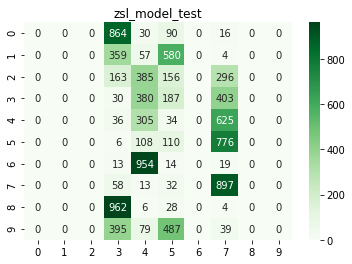

In [42]:
# predict test data
predict_zsl_kdtree(zsl_model, tree, x_test_norm, y_test, "zsl_model_test")

(2000, 32, 32, 3) (2000, 1) (2000, 50)
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


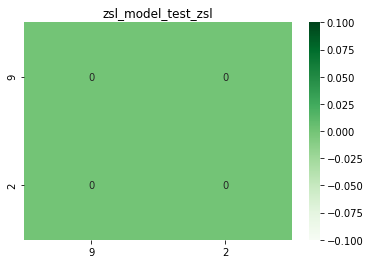

In [43]:
# predict zsl test data
predict_zsl_kdtree(zsl_model, tree, x_zsl_test_norm, y_zsl_test, "zsl_model_test_zsl")

## predict test data using word class model 

(40000, 32, 32, 3) (40000, 1) (40000, 50)
Accuracy: 0.622
Precision: 0.6535767644347091
Recall: 0.622
F1 Score: 0.564944543818742


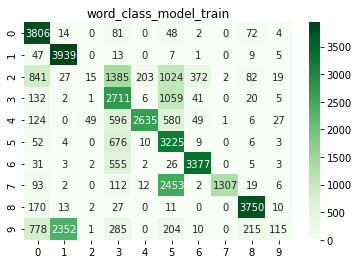

In [44]:
# predict word class train data
predict_zsl_kdtree(word_class_model, tree, x_train_norm, y_train, "word_class_model_train")

(10000, 32, 32, 3) (10000, 1) (10000, 50)
Accuracy: 0.5732
Precision: 0.622130766697075
Recall: 0.5732
F1 Score: 0.5198034340736968


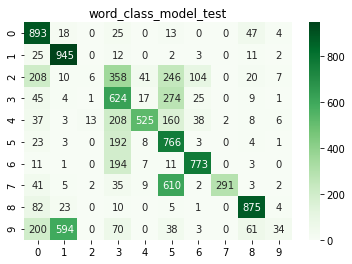

In [45]:
# predict word class test data
predict_zsl_kdtree(word_class_model, tree, x_test_norm, y_test, "word_class_model_test")

(2000, 32, 32, 3) (2000, 1) (2000, 50)
Accuracy: 0.02
Precision: 0.9146341463414634
Recall: 0.02
F1 Score: 0.03862511768963548


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


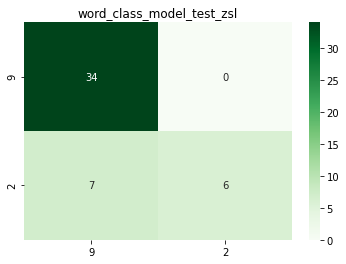

In [46]:
# predict word class test zsl data
predict_zsl_kdtree(word_class_model, tree, x_zsl_test_norm, y_zsl_test, "word_class_model_test_zsl")

## predict top 5 accuracy

In [0]:
def predict_zsl(x_zsl_test, y_zsl_test):
    pred_model = image_class_model.predict_classes(x_zsl_test)
    pred_zsl = zsl_model.predict(x_zsl_test)
    pred_word_zsl = word_class_model.predict(x_zsl_test)
    print ("pred_model shape", pred_model.shape)
    print ("pred_zsl shape", pred_zsl.shape)
    print ("pred_word_zsl shape", pred_word_zsl.shape)
    # pred_zsl
    top5, top3, top1 = 0, 0, 0
    count_model = 0
    for i, pred in enumerate(pred_zsl):
        pred            = np.expand_dims(pred, axis=0)
        dist_5, index_5 = tree.query(pred, k=5)
        pred_labels     = [classnames[index] for index in index_5[0]]
        true_label      = cifar10_labels[y_zsl_test[i][0]]
        if true_label in pred_labels[:5]:
            top5 += 1
        if true_label in pred_labels[:3]:
            top3 += 1
        if true_label == pred_labels[0]:
            top1 += 1

    # pred_word_zsl
    top5w, top3w, top1w = 0, 0, 0
    count_model = 0
    for i, pred in enumerate(pred_word_zsl):
        pred            = np.expand_dims(pred, axis=0)
        dist_5, index_5 = tree.query(pred, k=5)
        pred_labels     = [classnames[index] for index in index_5[0]]
        true_label      = cifar10_labels[y_zsl_test[i][0]]
        if true_label in pred_labels[:5]:
            top5w += 1
        if true_label in pred_labels[:3]:
            top3w += 1
        if true_label == pred_labels[0]:
            top1w += 1

    print ("\ntop5 word class model accuracy:", (len(y_zsl_test), top5w, top3w, top1w))
    print("-> Top-5: %.2f" % (top5w / float(len(y_zsl_test))))
    print("-> Top-3: %.2f" % (top3w / float(len(y_zsl_test))))
    print("-> Top-1: %.2f" % (top1w / float(len(y_zsl_test))))
    print ("\ntop5 zsl model accuracy:", (len(y_zsl_test), top5, top3, top1))
    print("-> Top-5: %.2f" % (top5 / float(len(y_zsl_test))))
    print("-> Top-3: %.2f" % (top3 / float(len(y_zsl_test))))
    print("-> Top-1: %.2f" % (top1 / float(len(y_zsl_test))))
    # print("-> Top-1 model accuracy: %.2f" % (count_model / float(len(y_zsl_test))))

In [48]:
predict_zsl(x_test, y_test)

pred_model shape (10000,)
pred_zsl shape (10000, 50)
pred_word_zsl shape (10000, 50)

top5 word class model accuracy: (10000, 5974, 4099, 1664)
-> Top-5: 0.60
-> Top-3: 0.41
-> Top-1: 0.17

top5 zsl model accuracy: (10000, 5026, 3241, 1205)
-> Top-5: 0.50
-> Top-3: 0.32
-> Top-1: 0.12
